### Import Library:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load data:

Data file for season 2019-2020:

In [2]:
df1 = pd.read_csv('2019-2020.csv')
df1.head(5)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,9/8/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/8/2019,12:30,West Ham,Man City,0,5,A,0,1,...,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,E0,10/8/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,E0,10/8/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,E0,10/8/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93


In [3]:
df1['season'] = '2019-2020'

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Columns: 107 entries, Div to season
dtypes: float64(82), int64(16), object(9)
memory usage: 317.8+ KB


In [5]:
df1['Date'] = pd.to_datetime(df1['Date'], format='%d/%m/%Y')

Data file for 2 seasons 2020-2021 and  2021-2022:

In [6]:
df2 = pd.read_csv('combined_2020-2022.csv')
df2.head(5)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97


In [7]:
df2['Date'] = pd.to_datetime(df2['Date'], format='%d/%m/%Y')

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Columns: 106 entries, Div to AvgCAHA
dtypes: datetime64[ns](1), float64(82), int64(16), object(7)
memory usage: 629.5+ KB


Assign season to data:

In [9]:
# Define the date ranges for the two seasons
season_2020_2021_start = pd.Timestamp('2020-09-01')
season_2020_2021_end = pd.Timestamp('2021-06-30')
season_2021_2022_start = pd.Timestamp('2021-08-01')
season_2021_2022_end = pd.Timestamp('2022-06-30')

In [10]:
df2['season'] = df2['Date'].apply(lambda x: '2020-2021' if season_2020_2021_start <= x <= season_2020_2021_end 
                                else '2021-2022' if season_2021_2022_start <= x <= season_2021_2022_end
                                else 'Unknown')
df2['season'].unique()

array(['2020-2021', '2021-2022'], dtype=object)

Merge two dataframes:

In [11]:
df = pd.concat([df1,df2], ignore_index=True, axis=0)

Get summary:

In [12]:
df['season'].unique()

array(['2019-2020', '2020-2021', '2021-2022'], dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Columns: 107 entries, Div to season
dtypes: datetime64[ns](1), float64(82), int64(16), object(8)
memory usage: 953.1+ KB


In [14]:
pd.set_option('display.max_rows', 500)
def get_distinct_examples(col, n=5):
    return col.loc[~col.duplicated()].tolist()[:n]

summary = pd.DataFrame({
    'Column Name': df.columns,
    'Type': df.dtypes,
    '% of Missing': df.isnull().mean() * 100,
    'Distinct Values': df.nunique(),
    'Examples of Distinct Values': df.apply(lambda col: get_distinct_examples(col))
})
summary.reset_index()

,index,Column Name,Type,% of Missing,Distinct Values,Examples of Distinct Values
0,Div,Div,object,0.000000,1,[E0]
1,Date,Date,datetime64[ns],0.000000,373,"[2019-08-09 00:00:00, 2019-08-10 00:00:00, 201..."
2,Time,Time,object,0.000000,20,"[20:00, 12:30, 15:00, 17:30, 14:00]"
3,HomeTeam,HomeTeam,object,0.000000,24,"[Liverpool, West Ham, Bournemouth, Burnley, Cr..."
4,AwayTeam,AwayTeam,object,0.000000,24,"[Norwich, Man City, Sheffield United, Southamp..."
5,FTHG,FTHG,int64,0.000000,10,"[4, 0, 1, 3, 2]"
6,FTAG,FTAG,int64,0.000000,9,"[1, 5, 0, 3, 2]"
7,FTR,FTR,object,0.000000,3,"[H, A, D]"
8,HTHG,HTHG,int64,0.000000,6,"[4, 0, 1, 2, 5]"
9,HTAG,HTAG,int64,0.000000,6,"[0, 1, 2, 3, 5]"


There is no missing values

### Check Target Feature:

In [15]:
df['FTR'].unique()

array(['H', 'A', 'D'], dtype=object)

For overall 3 seasons:

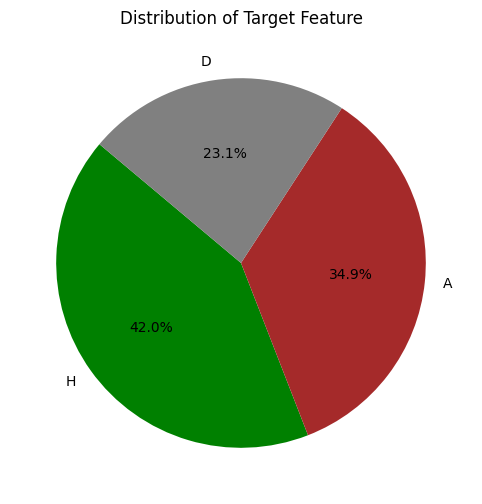

In [16]:
target_counts = df['FTR'].value_counts(normalize=True)

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140, colors=['green','brown', 'grey'])
plt.title('Distribution of Target Feature')
plt.show()

For each season:

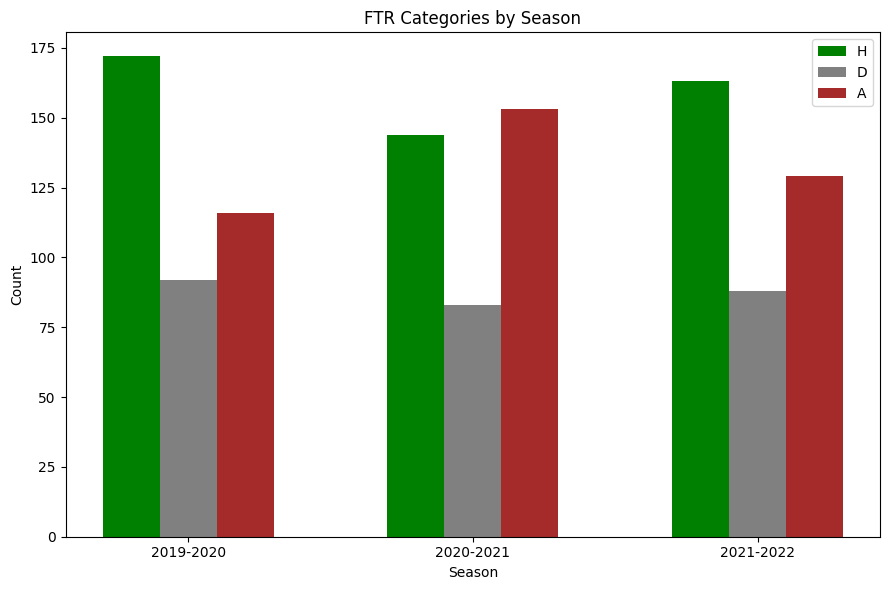

In [30]:
import matplotlib.pyplot as plt
import pandas as pd


df_ftr = df.groupby('season')['FTR'].value_counts().reset_index(name='count_values')

# Pivot the dataframe to get seasons as rows and FTR categories as columns
df_pivot = df_ftr.pivot(index='season', columns='FTR', values='count_values').fillna(0)

# Define the order of FTR categories and corresponding colors
ftr_order = ['H', 'D', 'A']
colors = ['green', 'grey', 'brown']

# Set the positions for each group and bar width
bar_width = 0.2
positions = range(len(df_pivot.index))

# Create the bar plot
fig, ax = plt.subplots(figsize=(9, 6))

# Plot each FTR category
for i, ftr in enumerate(ftr_order):
    ax.bar([p + i * bar_width for p in positions], df_pivot[ftr], bar_width, label=ftr, color=colors[i])

# Set the x-axis labels
ax.set_xlabel('Season')
ax.set_ylabel('Count')
ax.set_title('FTR Categories by Season')

# Set the x-ticks to the middle of the grouped bars
ax.set_xticks([p + bar_width for p in positions])
ax.set_xticklabels(df_pivot.index)

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


Mapping target feature, with Home team winning is 1, Drawing or Away team winning is 0:

In [31]:
df['FTR'] = df['FTR'].replace({'H': 1, 'D': 0, 'A': 0})

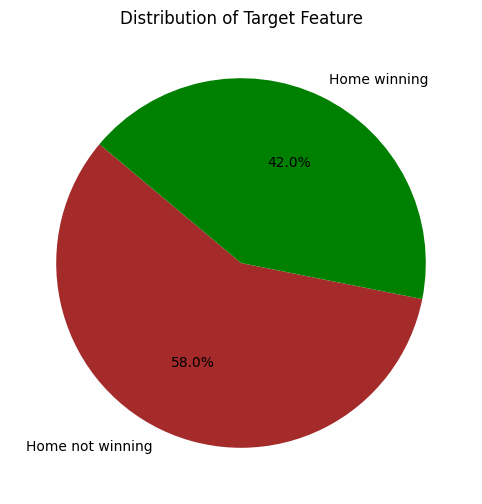

In [32]:
# Calculate the target counts
target_counts = df['FTR'].value_counts(normalize=True)

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(target_counts, labels=['Home not winning', 'Home winning'], autopct='%1.1f%%', startangle=140, colors=['brown', 'green'])
plt.title('Distribution of Target Feature')

plt.show()


The target feature is approximately balanced

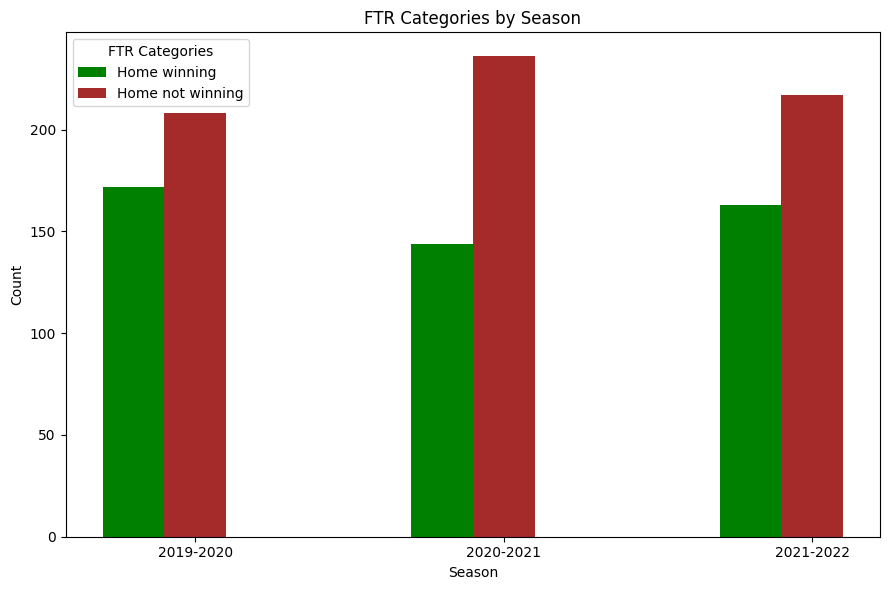

In [46]:
df_ftr = df.groupby('season')['FTR'].value_counts().reset_index(name='count_values')

# Pivot the dataframe to get seasons as rows and FTR categories as columns
df_pivot = df_ftr.pivot(index='season', columns='FTR', values='count_values').fillna(0)
df_pivot.rename(columns={1: 'Home winning', 0: 'Home not winning'}, inplace=True)
# Define the order of FTR categories and corresponding colors
ftr_order = ['Home winning', 'Home not winning']
colors = ['green', 'brown']

# Set the positions for each group and bar width
bar_width = 0.2
positions = range(len(df_pivot.index))

# Create the bar plot
fig, ax = plt.subplots(figsize=(9, 6))

# Plot each FTR category
for i, ftr in enumerate(ftr_order):
    ax.bar([p + i * bar_width for p in positions], df_pivot[ftr], bar_width, label=ftr, color=colors[i])

# Set the x-axis labels
ax.set_xlabel('Season')
ax.set_ylabel('Count')
ax.set_title('Fulltime Results by Season')

# Set the x-ticks to the middle of the grouped bars
ax.set_xticks([p + bar_width for p in positions])
ax.set_xticklabels(df_pivot.index)

ax.legend(title="Fulltime Results")

# Show the plot
plt.tight_layout()
plt.show()


### Categorical Features:

- Haft time result (HTR):

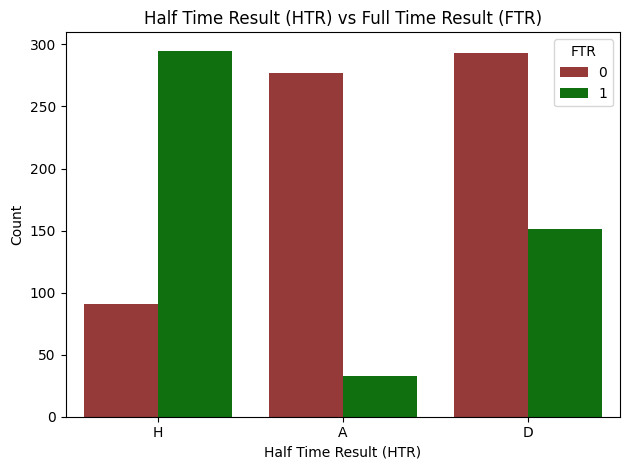

In [21]:
sns.countplot(data=df, x='HTR', hue='FTR', palette={0: 'brown', 1: 'green'})
plt.title('Half Time Result (HTR) vs Full Time Result (FTR)')
plt.xlabel('Half Time Result (HTR)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

 If a team is leading at halftime, they almost always go on to win the game by full time.  
 When the game is tied at halftime, the home team is more likely not to win (draw or lose).

- Referee:

In [22]:
df['Referee'].unique()

array(['M Oliver', 'M Dean', 'K Friend', 'G Scott', 'J Moss', 'C Pawson',
       'C Kavanagh', 'A Marriner', 'M Atkinson', 'A Taylor', 'L Mason',
       'S Attwell', 'D Coote', 'O Langford', 'P Tierney', 'A Madley',
       'P Bankes', 'S Hooper', 'T Robinson', 'R Jones', 'S Scott',
       'D England', 'A Moss', 'J Gillett', 'M Salisbury', 'J Brooks',
       'T Harrington'], dtype=object)

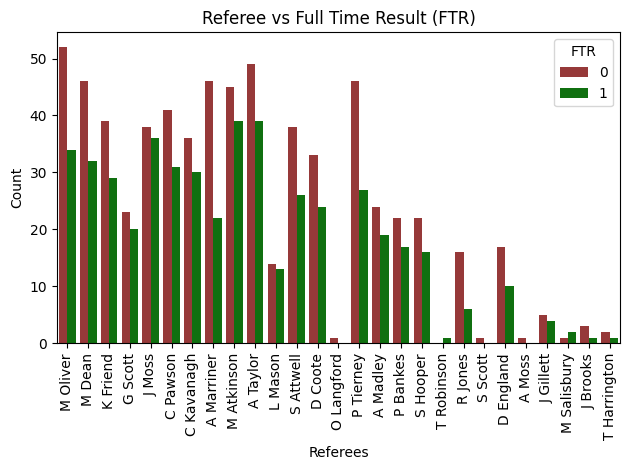

In [23]:
sns.countplot(data=df, x='Referee', hue='FTR', palette={1: 'green', 0: 'brown'})
plt.title('Referee vs Full Time Result (FTR)')
plt.xlabel('Referees')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.tight_layout()
plt.show()

However, we assume that Referees are working fairly, we decided to drop this feature

In [24]:
df = df.drop('Referee', axis= 1)

### Numerical Features:

- FTHG and FTAG:

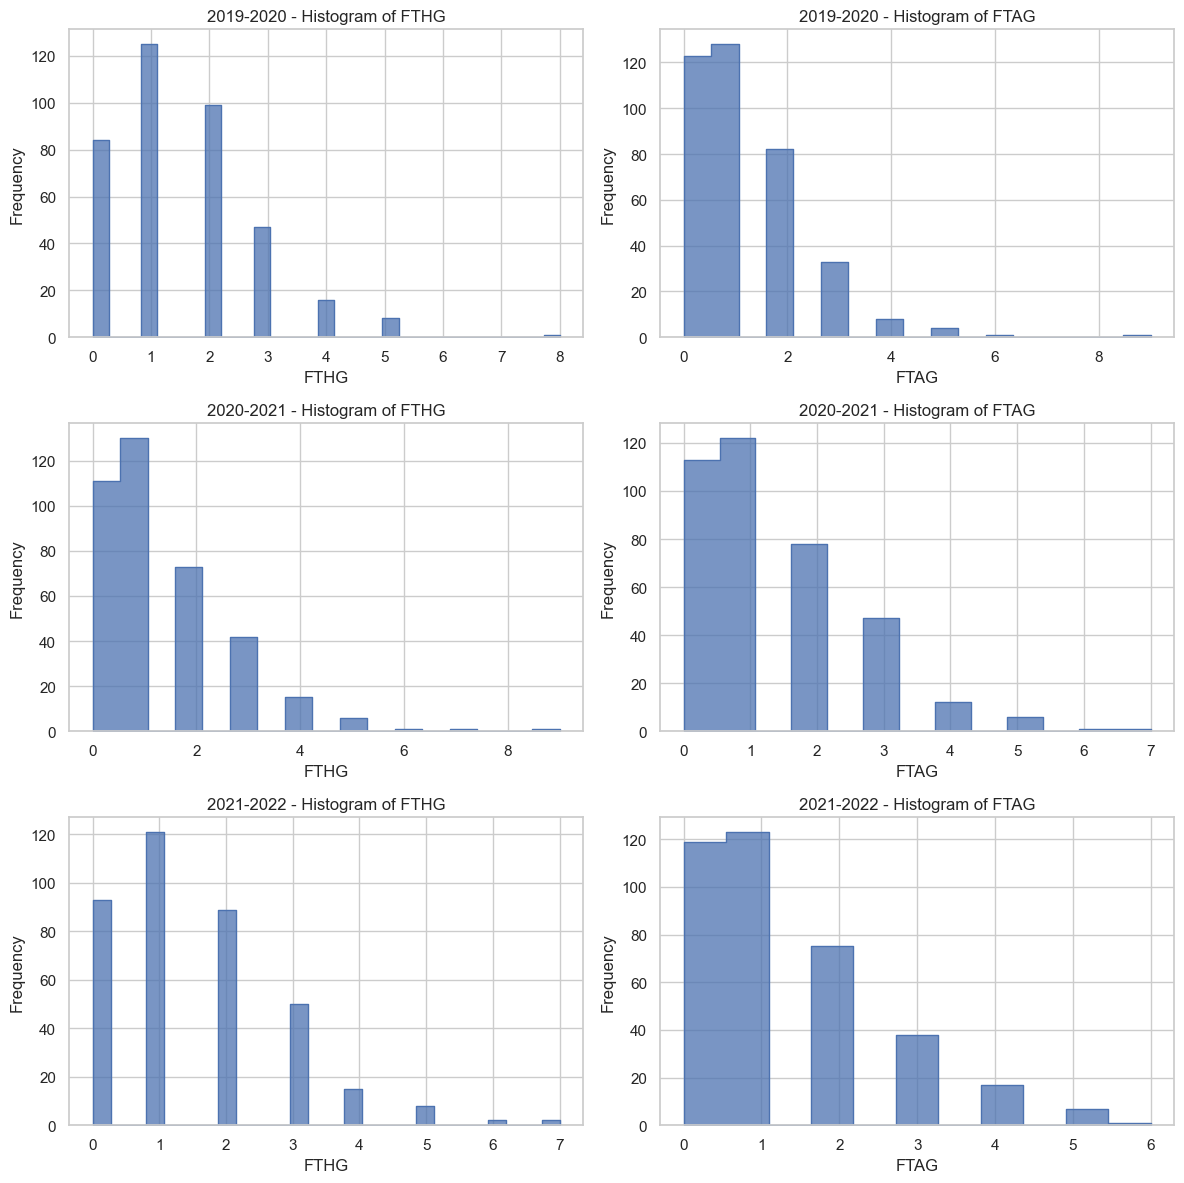

In [76]:
# Create a plot for each season with histograms for the selected features (FTHG, FTAG)
seasons = df['season'].unique()
cur_features = ['FTHG', 'FTAG']

# Set up the figure and axes
fig, axes = plt.subplots(len(seasons), len(cur_features), figsize=(12, 12))
axes = axes.flatten()

# Loop through each season and feature to create histograms
for i, season in enumerate(seasons):
    season_data = df[df['season'] == season]
    for j, var in enumerate(cur_features):
        ax = axes[i * len(cur_features) + j]
        sns.histplot(data=season_data, x=var, element="step", stat="count", common_norm=False, ax=ax)
        ax.set_title(f'{season} - Histogram of {var}')
        ax.set_xlabel(var)
        ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


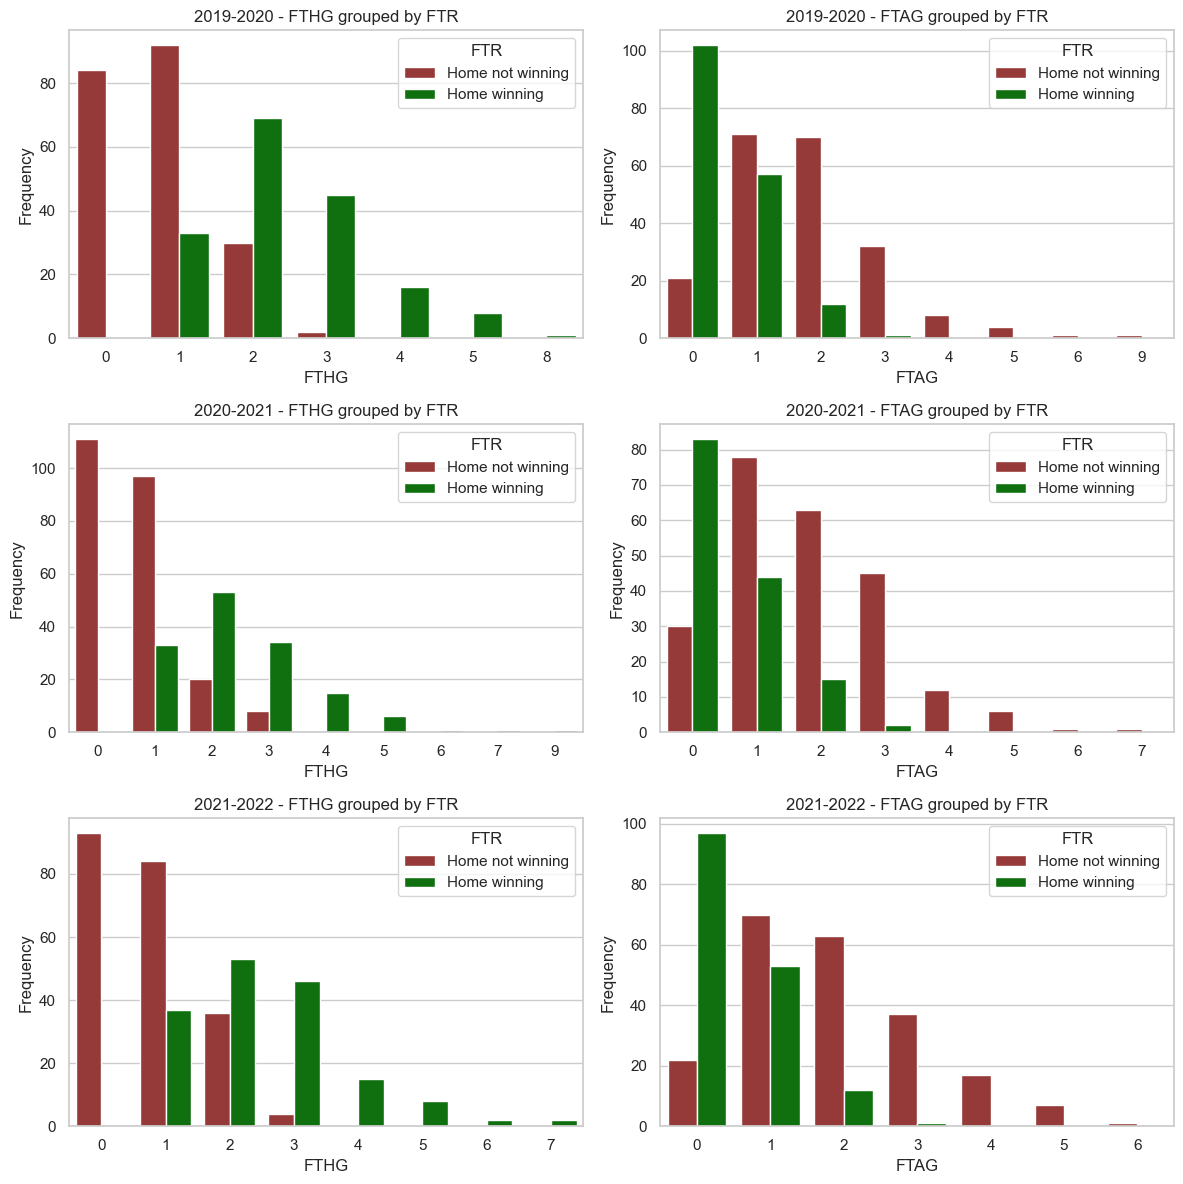

In [78]:
# Creating a plot for each season with count plots of FTHG and FTAG grouped by FTR
seasons = df['season'].unique()
cur_features = ['FTHG', 'FTAG']

# Set up the figure and axes
fig, axes = plt.subplots(len(seasons), len(cur_features), figsize=(12, 12))
axes = axes.flatten()

# Loop through each season and feature to create count plots grouped by FTR
for i, season in enumerate(seasons):
    season_data = df[df['season'] == season]
    for j, var in enumerate(cur_features):
        ax = axes[i * len(cur_features) + j]
        sns.countplot(data=season_data, x=var, hue='FTR', palette={1: 'green', 0: 'brown'}, ax=ax)
        ax.set_title(f'{season} - {var} grouped by FTR')
        ax.set_xlabel(var)
        ax.set_ylabel('Frequency')

        handles, labels = ax.get_legend_handles_labels()
        labels = ['Home not winning', 'Home winning']  # Custom labels
        ax.legend(handles, labels, title="FTR")

plt.tight_layout()
plt.show()


Home teams usually win if they score at least 2 goals, but have a higher chance of losing or drawing if they score fewer than 2 goals.   
Similarly, home teams tend to win if they concede fewer than 1 goal, and are less likely to win if they concede 1 or more goals.

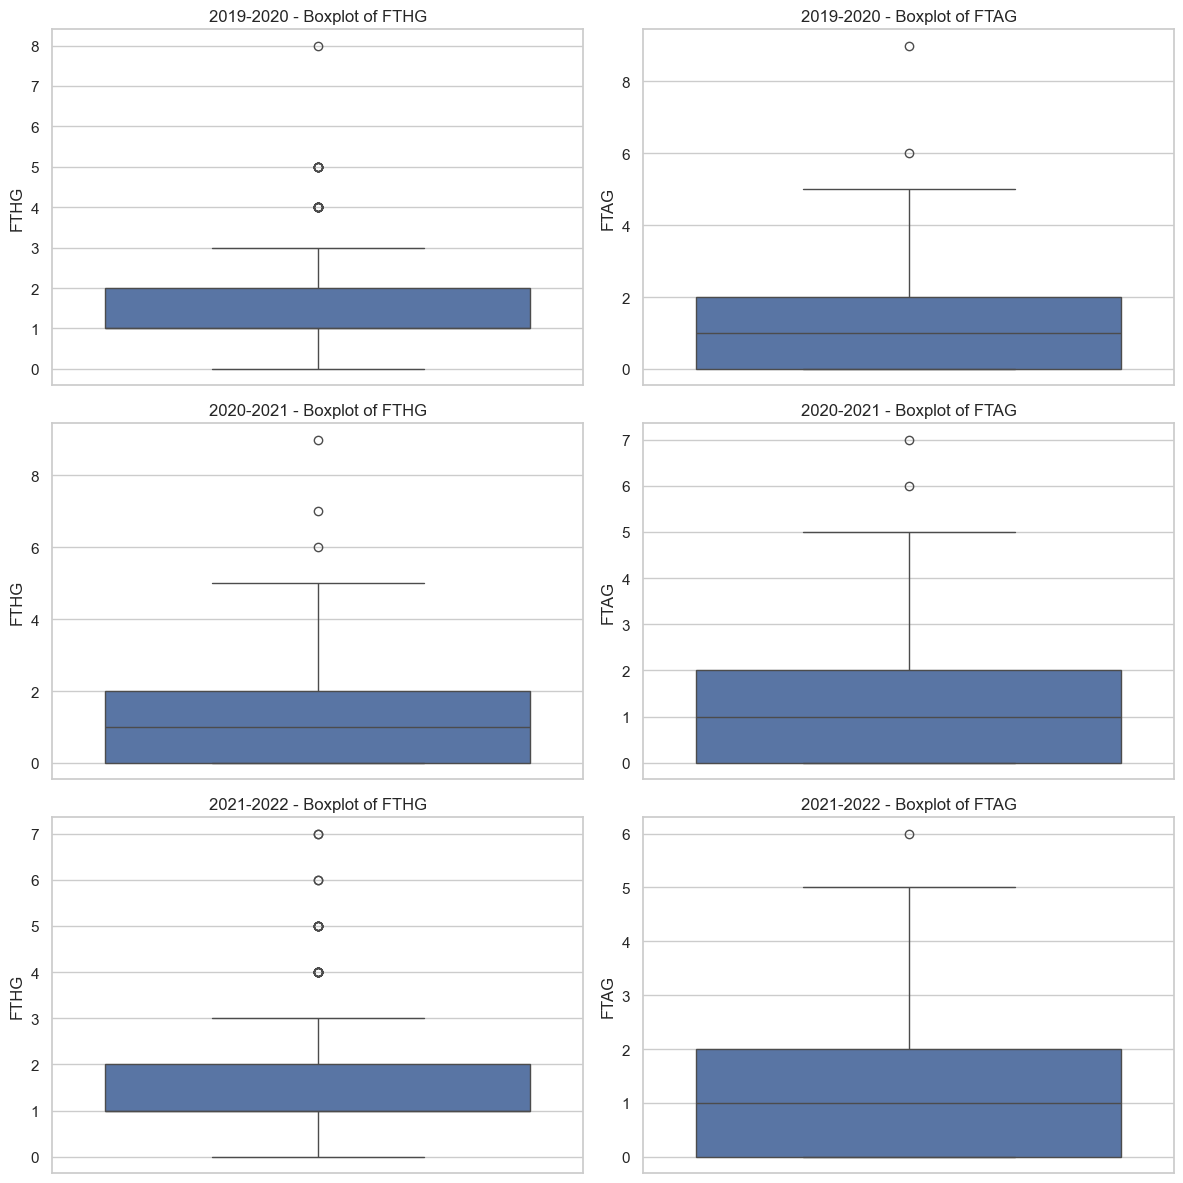

In [85]:
# Create a boxplot for each season with the features FTHG and FTAG
seasons = df['season'].unique()
cur_features = ['FTHG', 'FTAG']

# Set up the figure and axes
fig, axes = plt.subplots(len(seasons), len(cur_features), figsize=(12, 12))
axes = axes.flatten()

# Loop through each season and feature to create boxplots
for i, season in enumerate(seasons):
    season_data = df[df['season'] == season]
    for j, var in enumerate(cur_features):
        ax = axes[i * len(cur_features) + j]
        sns.boxplot(data=season_data[var], ax=ax)
        ax.set_title(f'{season} - Boxplot of {var}')
        ax.set_ylabel(var)

plt.tight_layout()
plt.show()


- Other team statistics features:

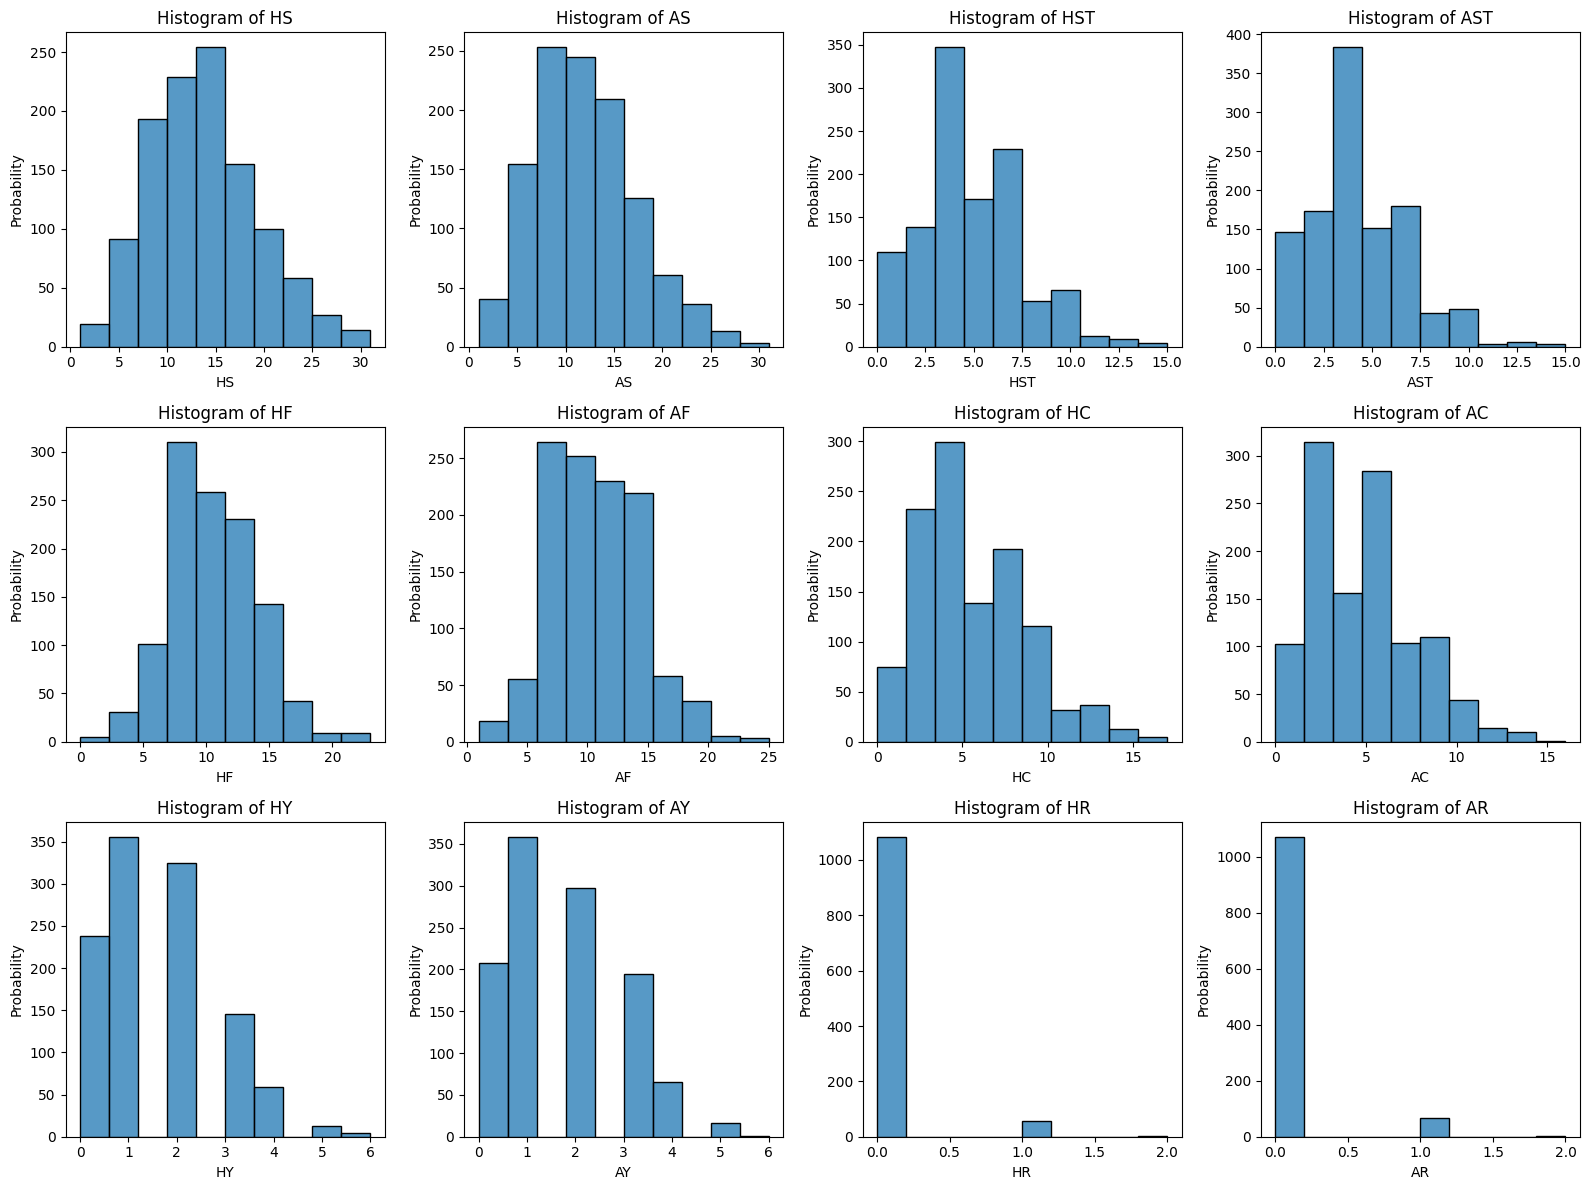

In [26]:
features = ['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

# Plot histograms for each feature
for i, var in enumerate(features):
    sns.histplot(df[var], bins=10, ax=axes[i])
    # sns.histplot(data=df, x=var, hue='FTR', kde=True, element="step", stat="probability", common_norm=False, ax=axes[i])
    axes[i].set_title(f'Histogram of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Probability')

plt.tight_layout()
plt.show()

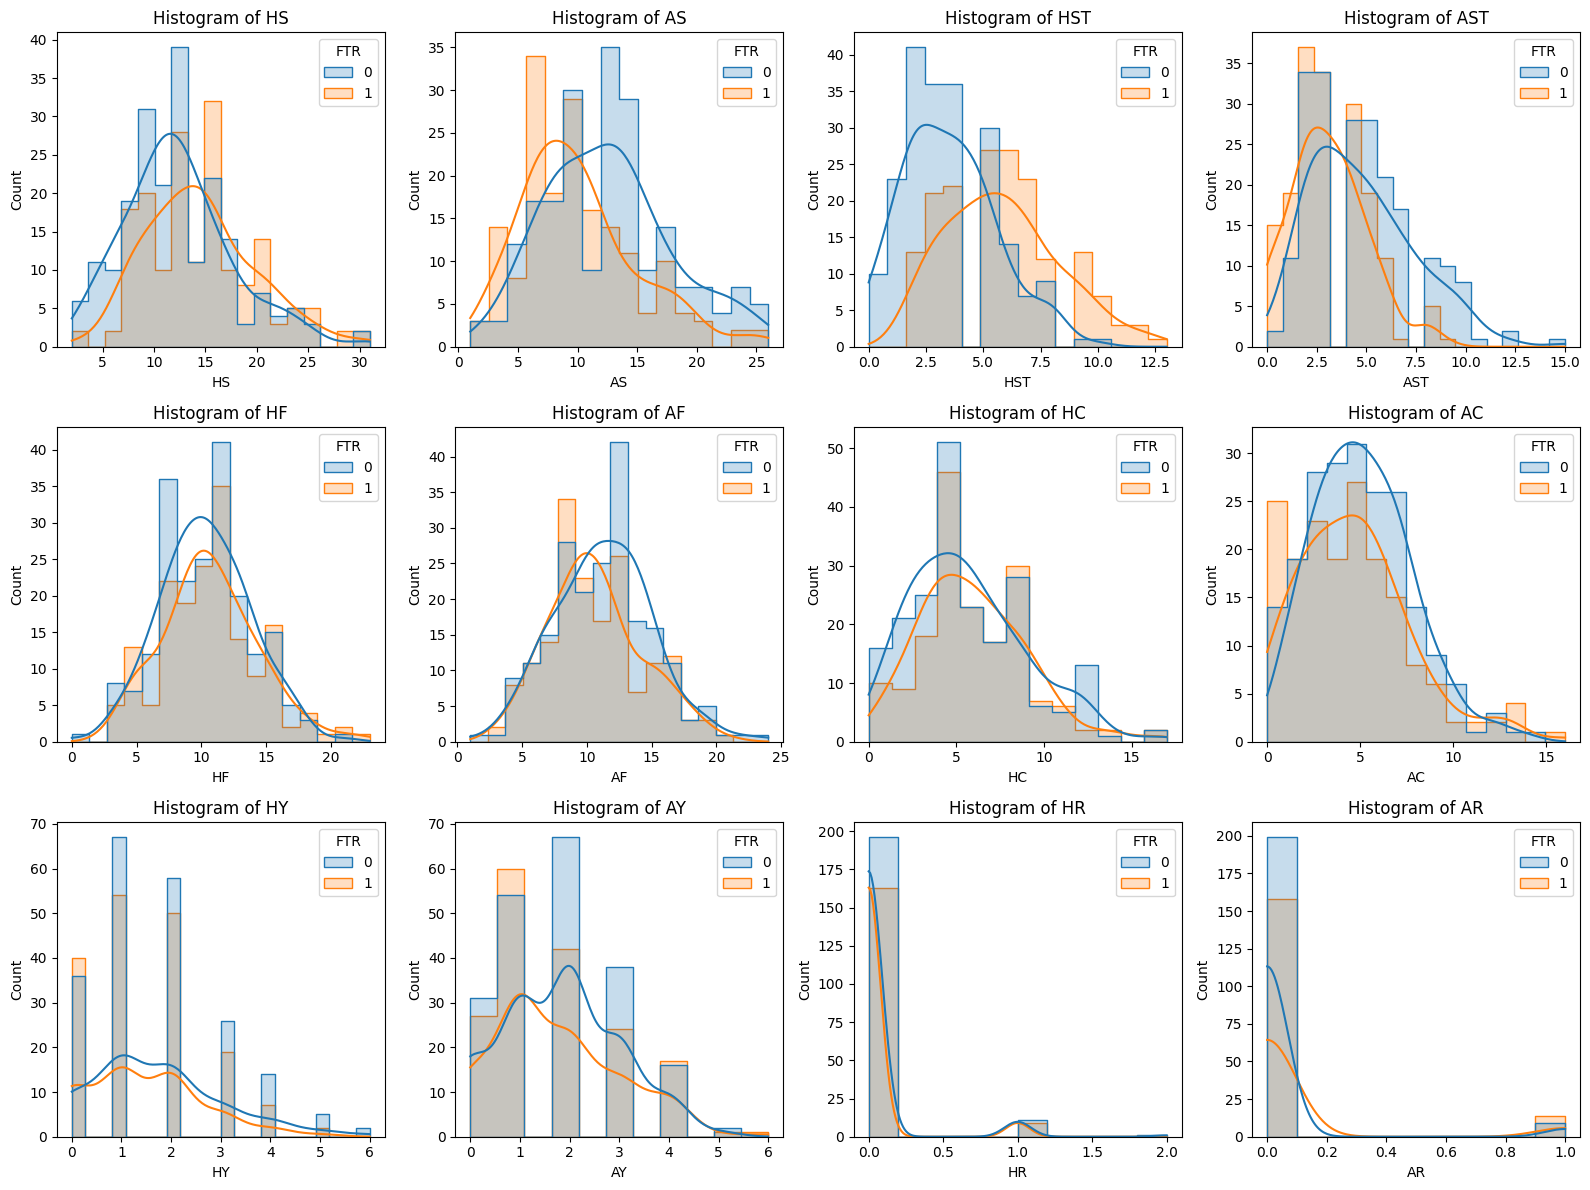

In [32]:
features = ['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

df_2019 = df[df['season'] == '2019-2020']
# Plot histograms for each feature
for i, var in enumerate(features):
    # sns.histplot(df[var], bins=10, ax=axes[i])
    sns.histplot(data=df_2019, x=var, hue='FTR', kde=True, element="step", stat="count", common_norm=False, ax=axes[i])
    axes[i].set_title(f'Histogram of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

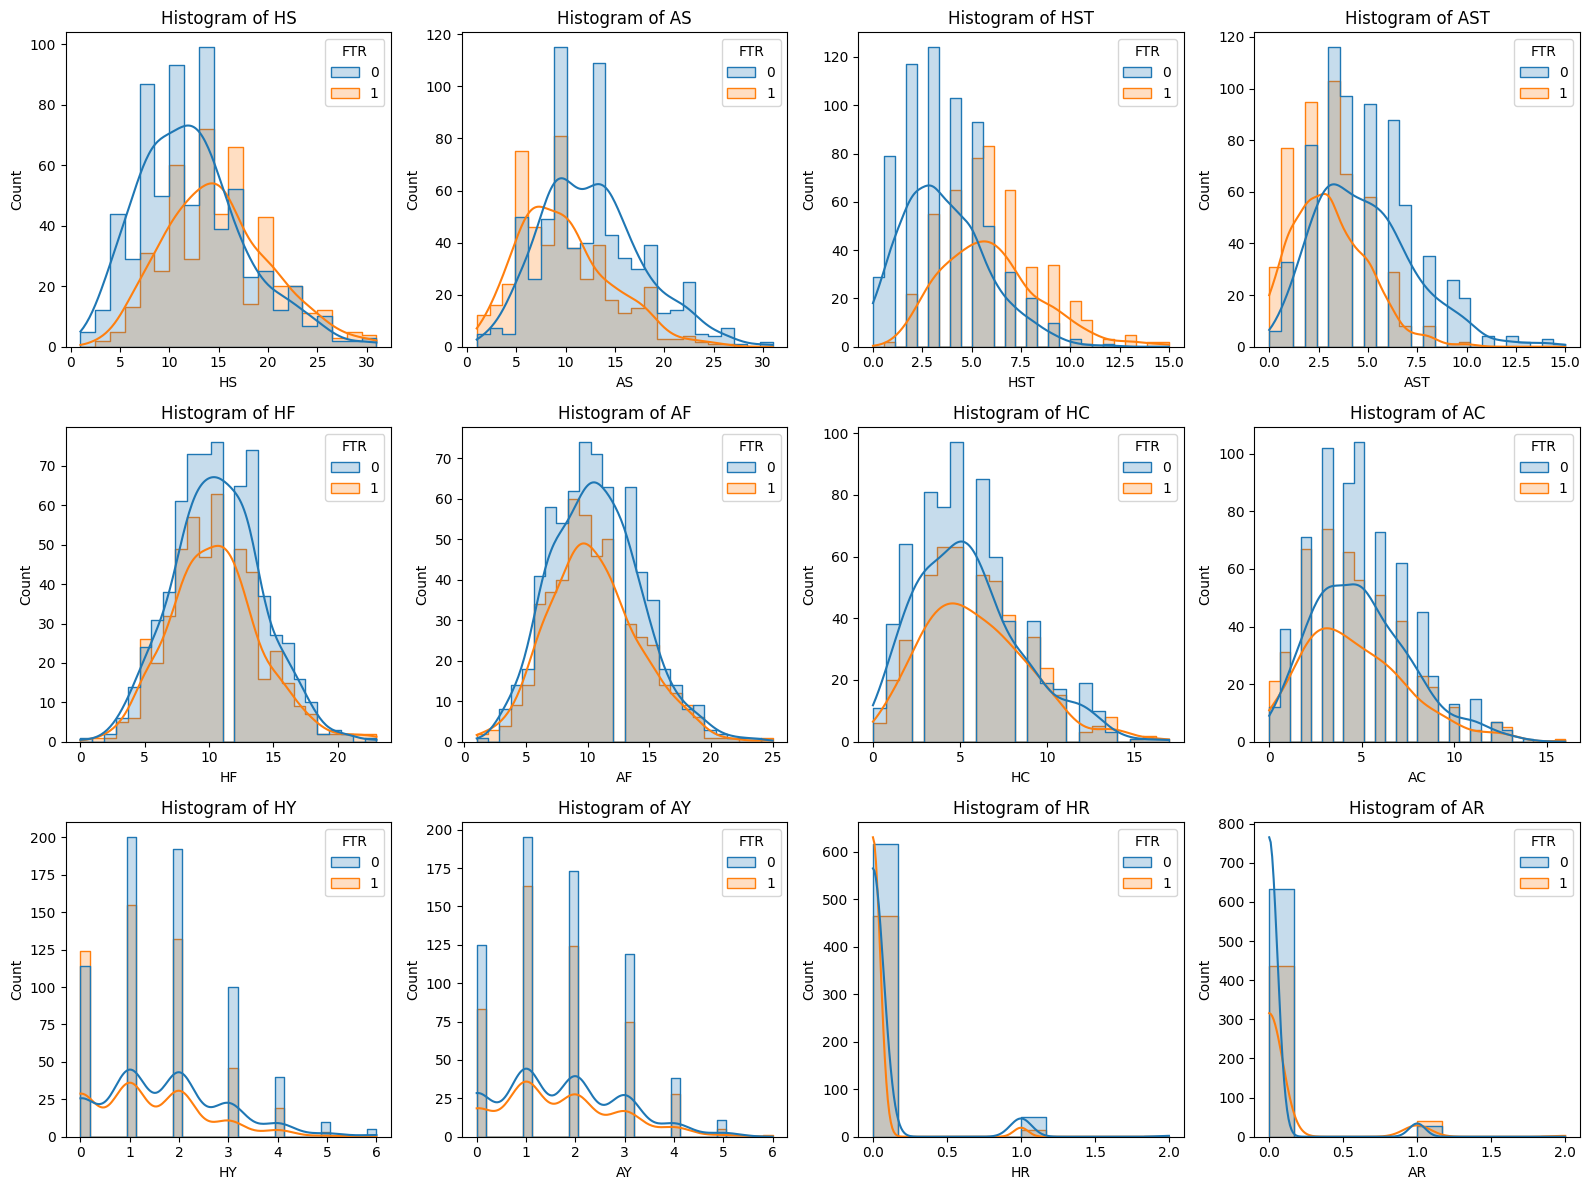

In [29]:
features = ['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

# Plot histograms for each feature
for i, var in enumerate(features):
    # sns.histplot(df[var], bins=10, ax=axes[i])
    sns.histplot(data=df, x=var, hue='FTR', kde=True, element="step", stat="count", common_norm=False, ax=axes[i])
    axes[i].set_title(f'Histogram of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

Shooting counts, shots on target, fouls, and yellow cards all follow similar distributions. Generally, the higher these metrics, the greater the chances for the home team to win, and vice versa for the away team. This suggests that the more aggressive a team is, the better its chances of winning.

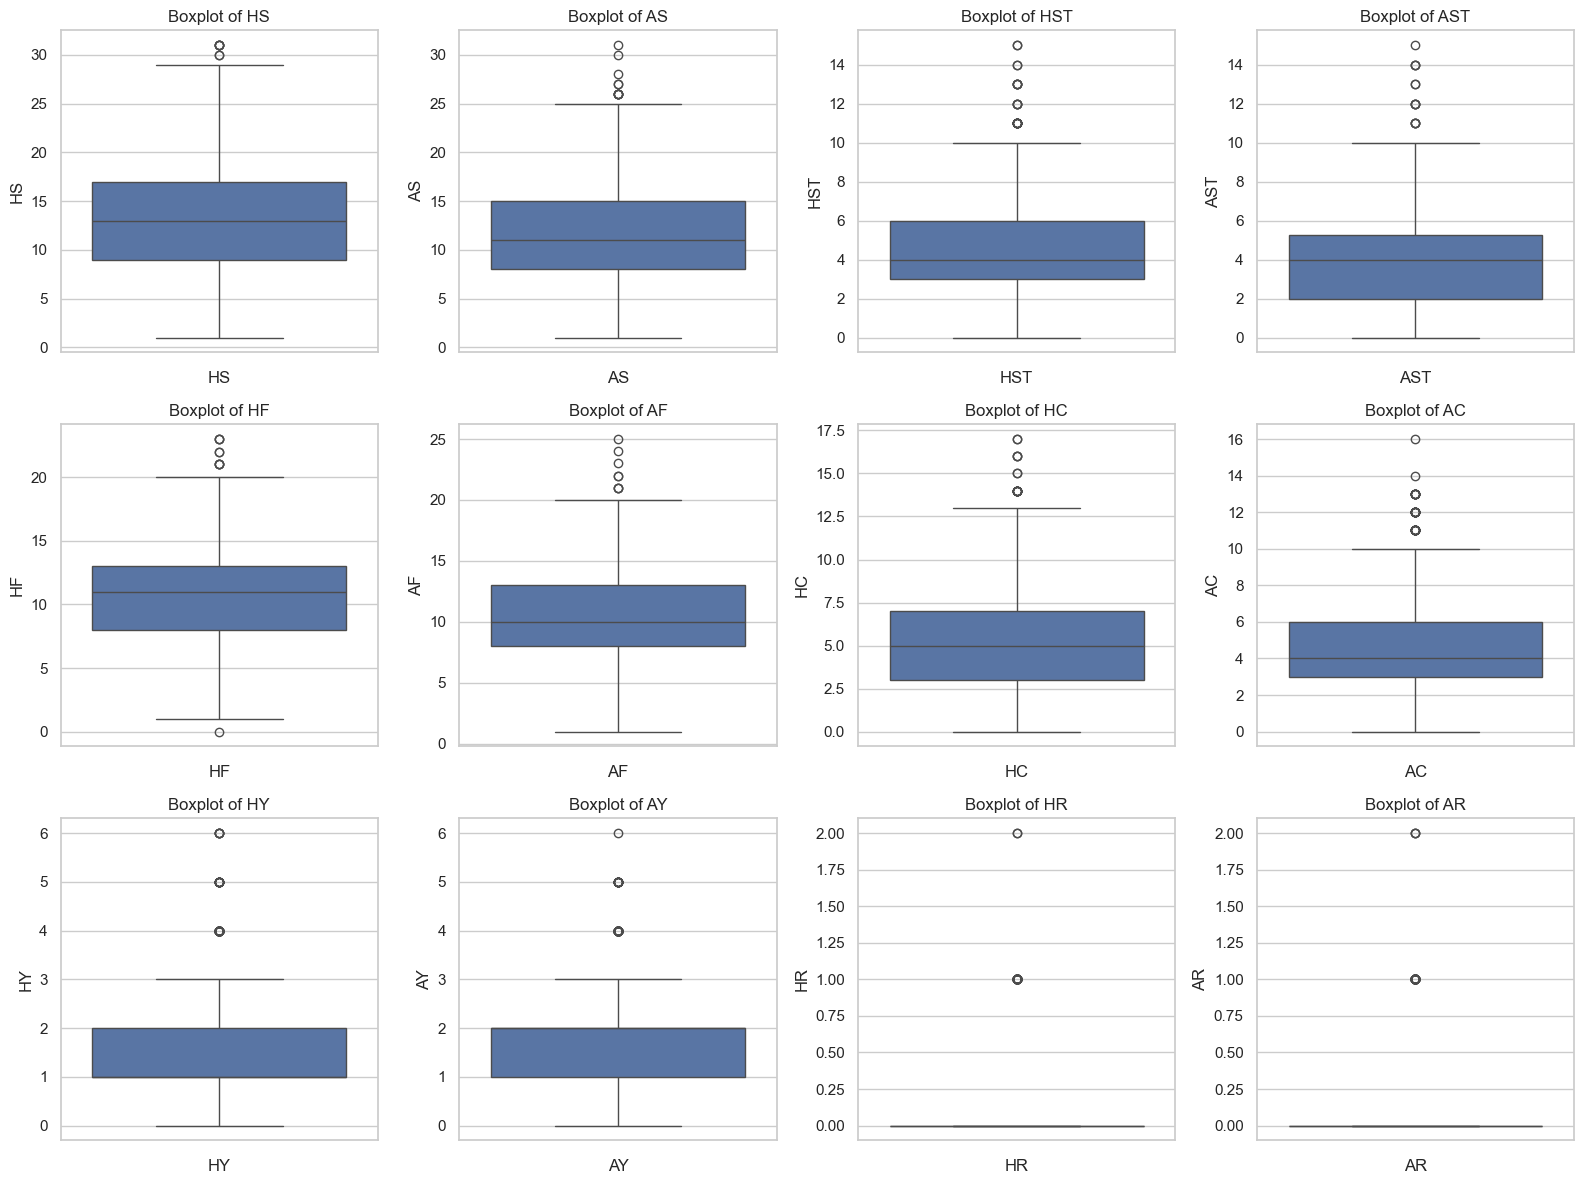

In [87]:
features = ['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']

# Create subplots
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

# Plot boxplots for each feature
for i, var in enumerate(features):
    sns.boxplot(y=df[var], ax=axes[i])
    axes[i].set_title(f'Boxplot of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

- Pair plot of team statistic features:

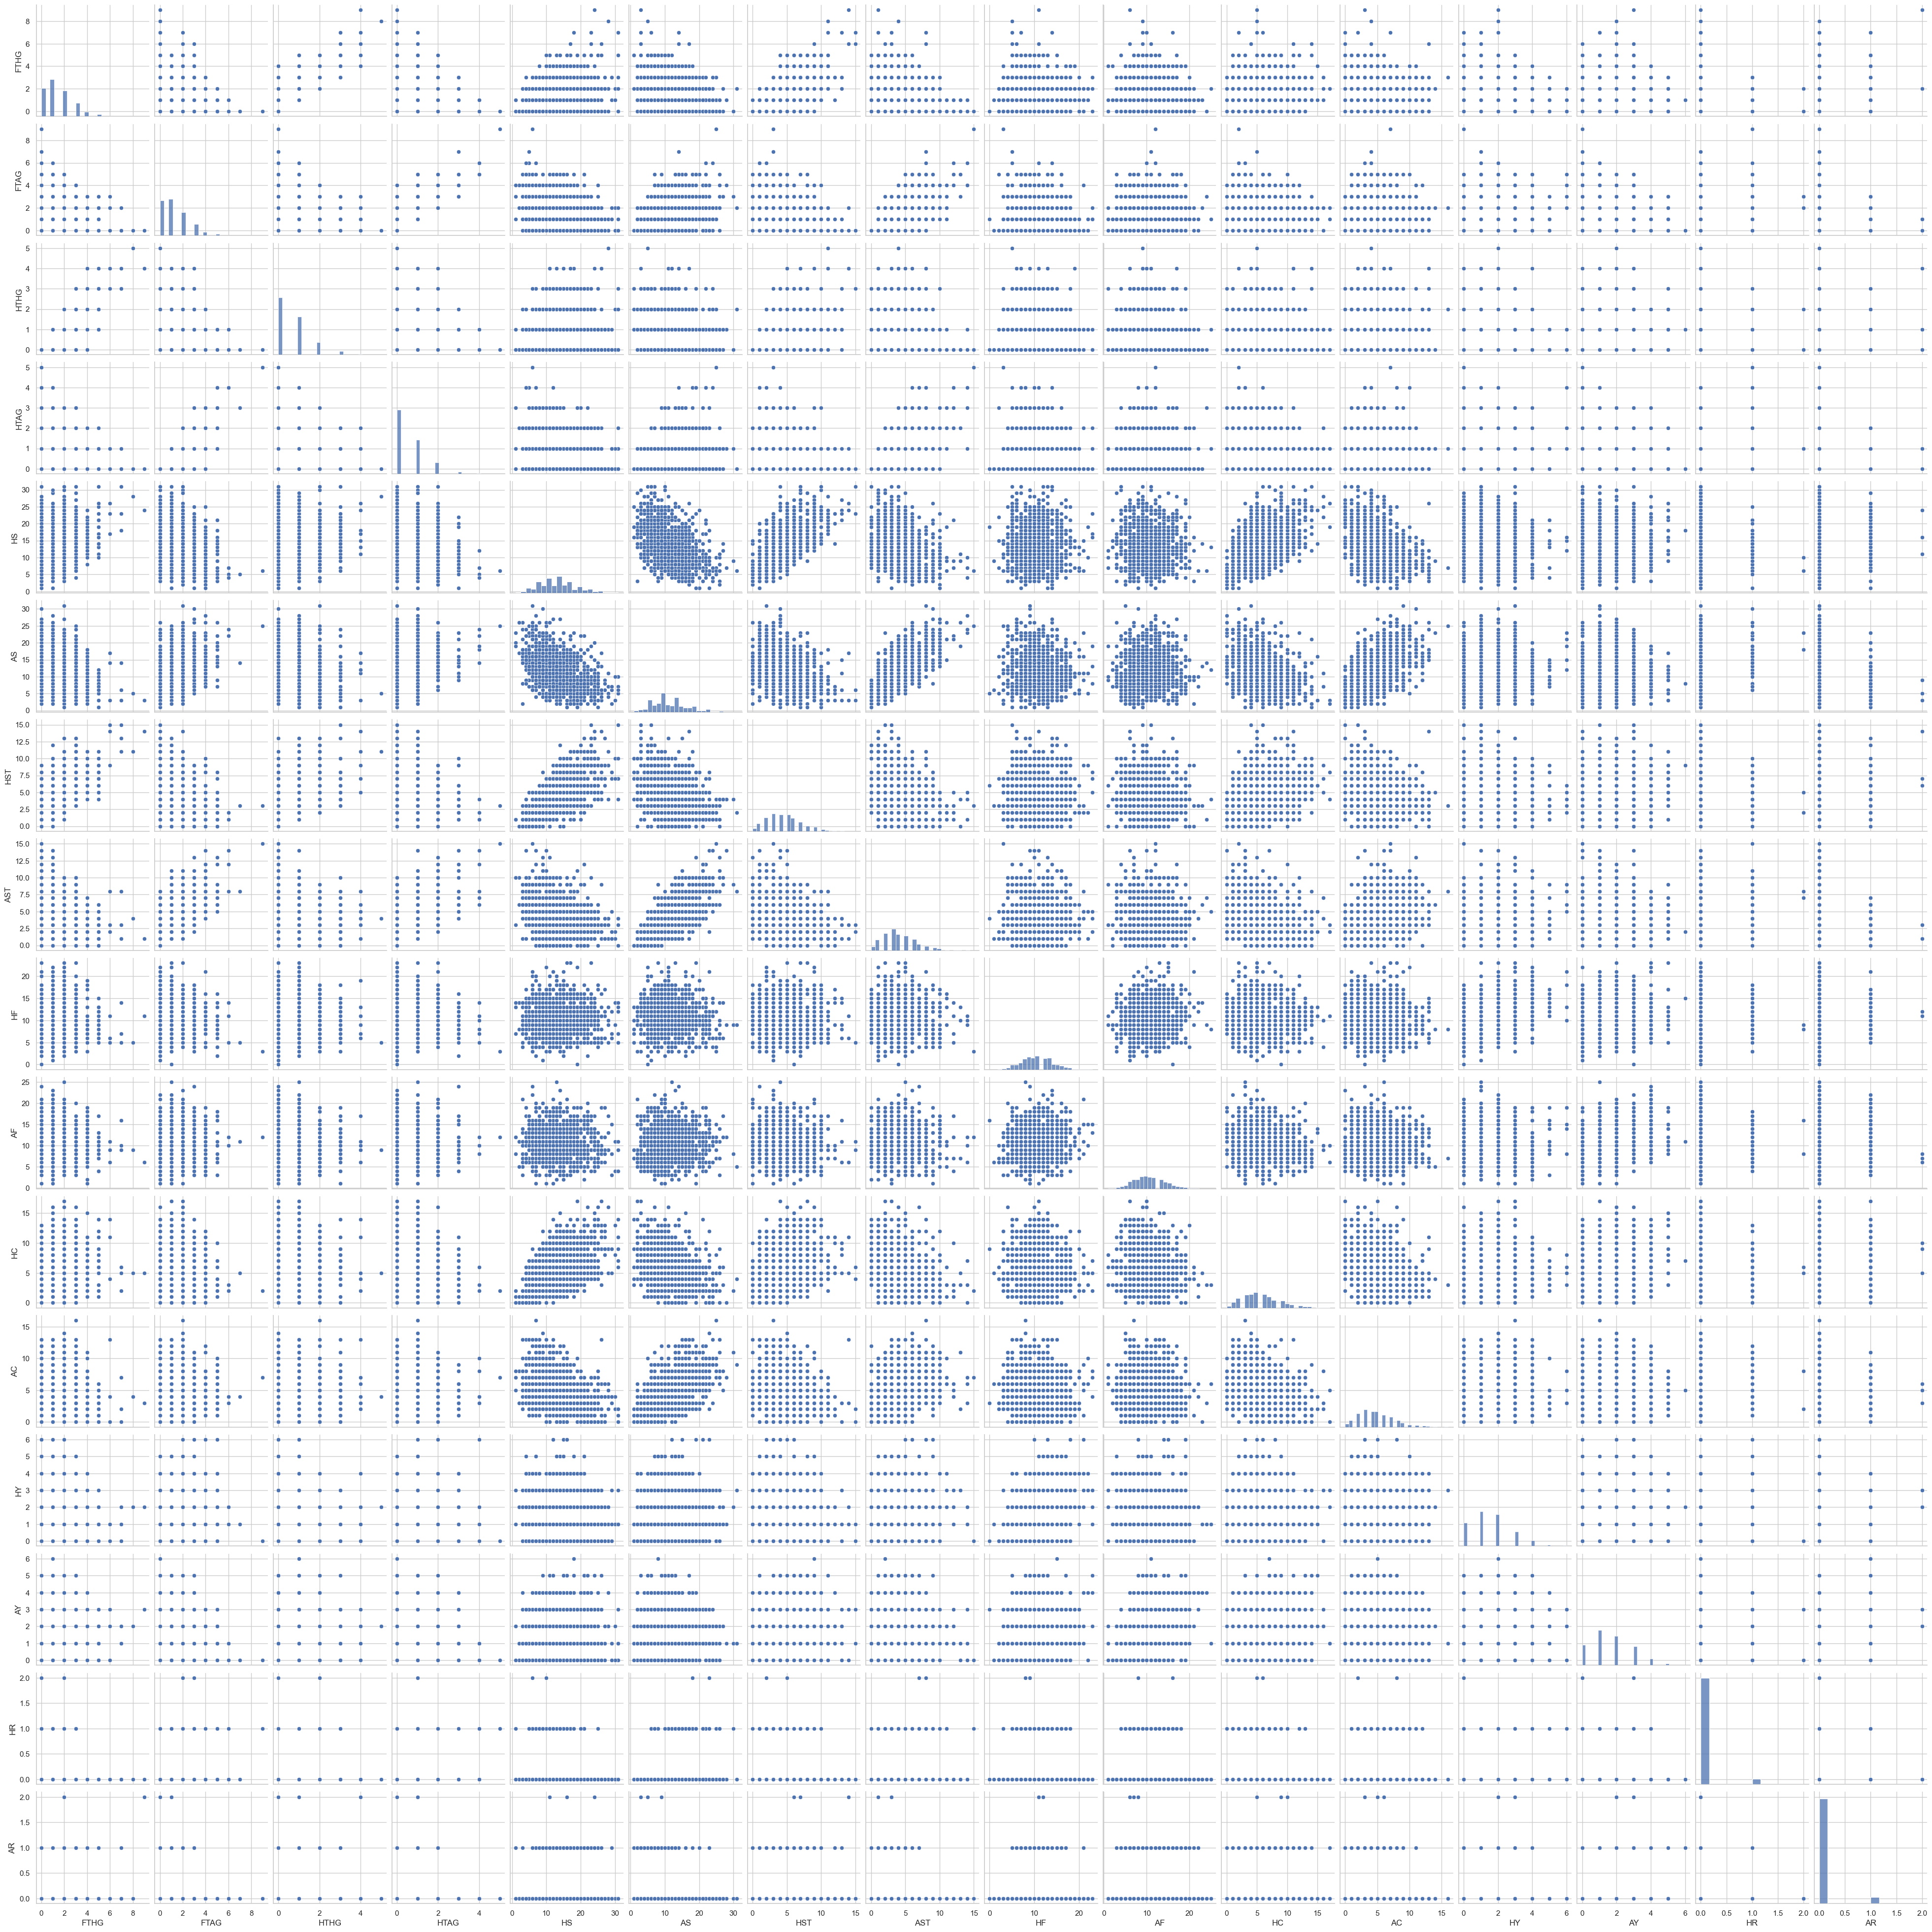

In [88]:
features = ['FTHG', 'FTAG','HTHG', 'HTAG' ,'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']
sns.pairplot(df[features])

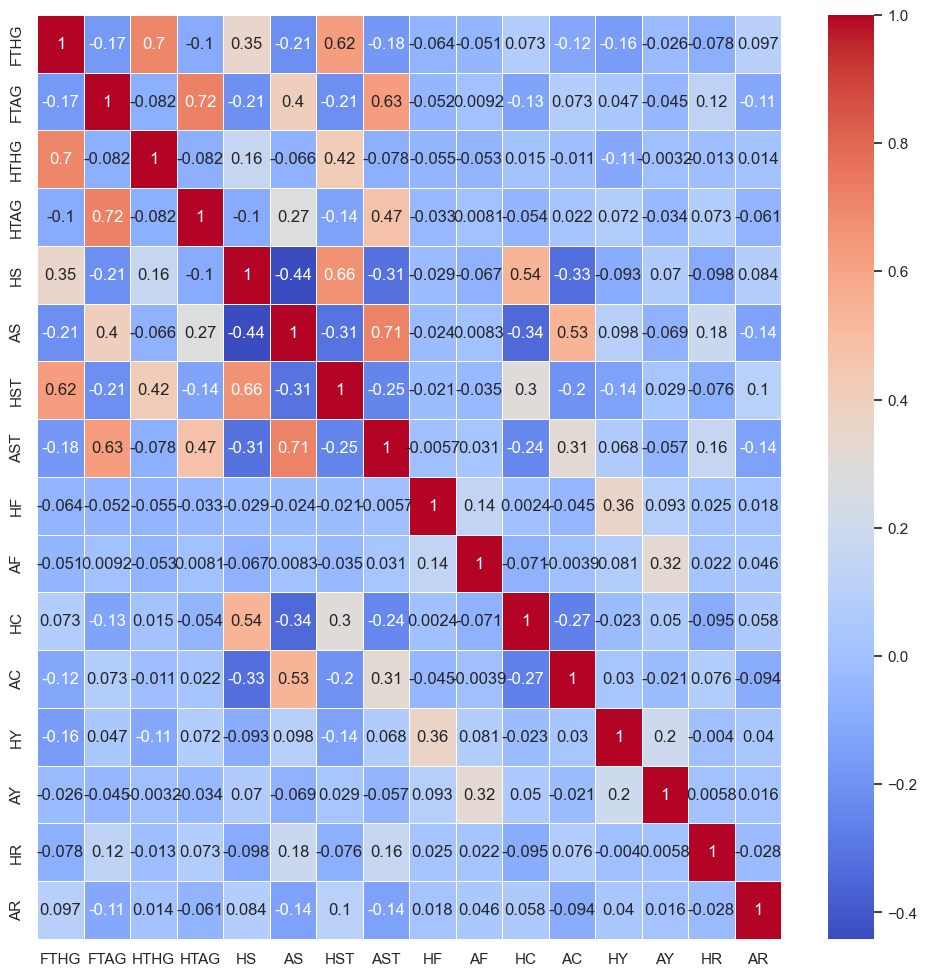

In [89]:
plt.figure(figsize=(12, 12))
sns.heatmap(df[features].corr(), annot=True, linewidths=.5, cmap='coolwarm')
plt.show()

Save files:

In [90]:
df.to_csv('EPL_2019_2022.csv', index=False)
